# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from urllib.error import HTTPError
import openweathermapy as ow
from pprint import pprint
import pandas as pd
import numpy as np
import requests
import time
import os

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
os.makedirs(os.path.join('output_data'),exist_ok=True)
output_data_file = os.path.join("output_data","cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

589

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Starting URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
# create setting and desired_keys
setting = {'units':'Imperial','appid':api_key}
desired_keys = ['clouds.all','sys.country','dt','main.humidity','main.temp_max','wind.speed','coord.lat','coord.lon']

cloudiness = []
country = []
date = []
humidity = []
max_temp = []
wind_speed = []
lat =[]
lng =[]
cities_list = []

In [4]:
print('Beginning Data Retrieval')
print('---------------------')
counter = 1
for city in cities:
    city_url = base_url + '&q=' + city.replace(' ','+')
    print(f'Processing City # {counter} | {city}')
    print(city_url)
    try:
        city_data = ow.get_current(city,**setting)
        cl,ct,dt,hm,mt,ws,lt,ln = city_data(*desired_keys)
        cloudiness.append(cl)
        country.append(ct)
        date.append(dt)
        humidity.append(hm)
        max_temp.append(mt)
        wind_speed.append(ws)
        lat.append(lt)
        lng.append(ln)
        cities_list.append(city)
    except HTTPError:
        print('City not found. skipping...')
    counter += 1
print('---------------------')
print('Data Retrieval Complete')

Beginning Data Retrieval
---------------------
Processing City # 1 | amderma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=044f5570926022cce69828a7796ac9b7&q=amderma
City not found. skipping...
Processing City # 2 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=044f5570926022cce69828a7796ac9b7&q=tasiilaq
Processing City # 3 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=044f5570926022cce69828a7796ac9b7&q=jamestown
Processing City # 4 | bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=044f5570926022cce69828a7796ac9b7&q=bethel
Processing City # 5 | saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=044f5570926022cce69828a7796ac9b7&q=saldanha
Processing City # 6 | port moresby
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=044f5570926022cce69828a7796ac9b7&q=port+moresby
Processing City # 7 | hobart
http://api.openweathermap.org/data

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.DataFrame({
     'City':cities_list,
     'Cloudiness':cloudiness,
     'Country':country,
     'Date':date,
     'Humidity':humidity,
     'Lat':lat,
     'Lng':lng,
     'Max Temperature':max_temp,
     'Wind Speed':wind_speed,
     })
weather_df.head()
weather_df.to_csv(output_data_file)

In [6]:
weather_df.count()

City               542
Cloudiness         542
Country            542
Date               542
Humidity           542
Lat                542
Lng                542
Max Temperature    542
Wind Speed         542
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [7]:
def plot_lat(y,y_label):
    lat_y = plt.scatter(weather_df['Lat'],weather_df[y],alpha=0.75,edgecolors='black')
    plt.title(f"City Latitude vs. {y} ({time.strftime('%m/%d/%y')})")
    plt.xlabel('Latitude') 
    plt.ylabel(y_label)
    plt.xlim(-80,100)
    plt.ylim(min(weather_df[y])-20,max(weather_df[y])+20)
    plt.grid()
    plt.savefig(os.path.join('output_data',f'Latitude_vs_{y}.png'))

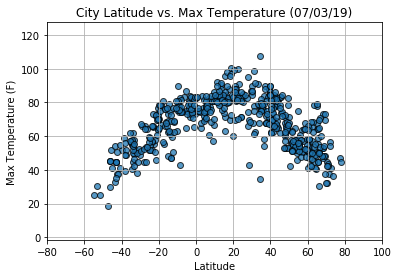

In [8]:
lat_temp = plot_lat(y='Max Temperature',y_label='Max Temperature (F)')
lat_temp

#### Latitude vs. Humidity Plot

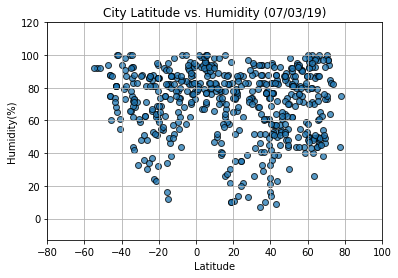

In [9]:
lat_humidity = plot_lat(y='Humidity',y_label='Humidity(%)')
lat_humidity

#### Latitude vs. Cloudiness Plot

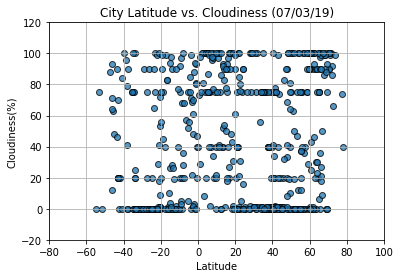

In [10]:
lat_cloud = plot_lat(y='Cloudiness',y_label='Cloudiness(%)')
lat_cloud

#### Latitude vs. Wind Speed Plot

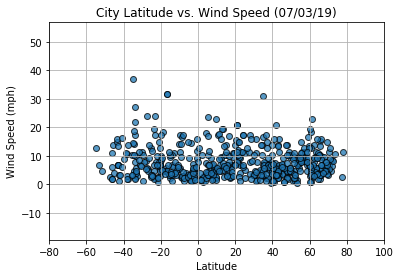

In [11]:
lat_wind = plot_lat(y='Wind Speed',y_label='Wind Speed (mph)')
lat_wind

In [12]:
def plot_lng(y,y_label):
    lat_y = plt.scatter(weather_df['Lng'],weather_df['Lat'],alpha=0.75,edgecolors='black')
    plt.title(f"City Longitude vs. {y} ({time.strftime('%m/%d/%y')})")
    plt.xlabel('Longitude') 
    plt.ylabel(y_label)
    plt.ylim(-80,100)
    plt.xlim(-200,200)
    plt.grid()
    plt.savefig(os.path.join('output_data',f'Longitude_vs_{y}.png'))

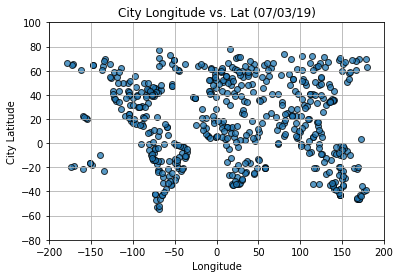

In [13]:
lng_lat = plot_lng(y='Lat',y_label='City Latitude')
lng_lat

In [ ]:
 ## Weather Data Analysis
  * As we approach the equator the temperature increases.
  * Since data has been collected in summer the temperatures are warmer in northen hemisphire.
  * There is no relationship between city latitude and wind speed, cloudiness and Humidity.